<a href="https://colab.research.google.com/github/hufsaim/T10203101/blob/master/notebook/ch11_9_Fourier_Transform_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import requests
url = 'https://file-examples-com.github.io/uploads/2017/11/file_example_WAV_1MG.wav'
r = requests.get(url,allow_redirects=True)

In [2]:
open('sample.wav','wb').write(r.content)

1073218

In [3]:
from scipy.io import wavfile
import scipy.io
from IPython.display import Audio

In [4]:
d = wavfile.read('sample.wav')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [5]:
print('sampling rate = ',d[0])
fs = d[0]

sampling rate =  8000


In [6]:
wav = d[1]
wav.shape

(268237, 2)

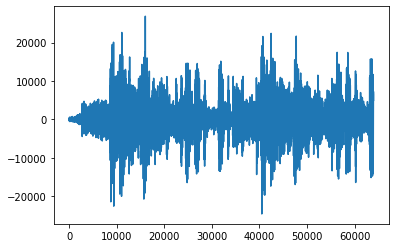

In [7]:
ts = 8 # 8 sec
wav = wav[:fs*ts,0]
plt.plot(wav)

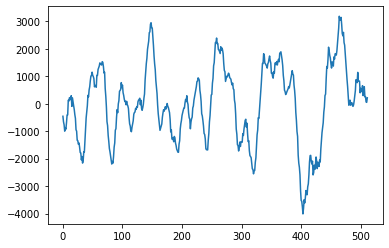

In [8]:
plt.plot(wav[30000:30000+512])

In [9]:
Audio(wav,rate=fs)

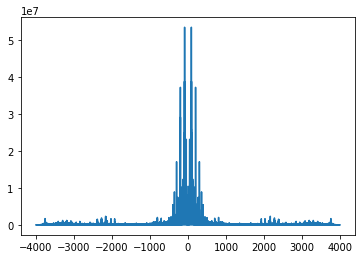

In [10]:
F = np.fft.fft(wav)
freq = np.fft.fftfreq(fs*ts,1/fs)
plt.plot(freq,np.abs(F))
plt.show()

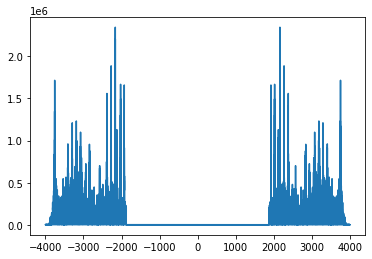

In [11]:
F[:15000] = 0
F[-15000:] = 0
plt.plot(freq,np.abs(F))

In [12]:
wav_HPF = np.fft.ifft(F)
Audio(wav_HPF,rate=fs)

/usr/local/lib/python3.6/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


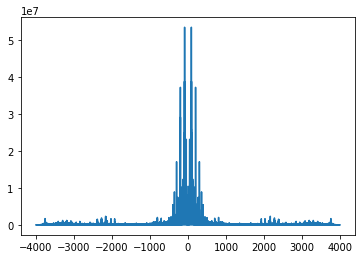

In [19]:
F = np.fft.fft(wav)
freq = np.fft.fftfreq(fs*ts,1/fs)
plt.plot(freq,np.abs(F))
plt.show()

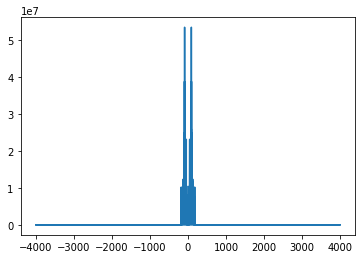

In [14]:
F[1500:-1500] = 0
plt.plot(freq,np.abs(F))

In [15]:
wav_LPF = np.fft.ifft(F)
Audio(wav_LPF,rate=fs)

/usr/local/lib/python3.6/dist-packages/IPython/lib/display.py:123: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


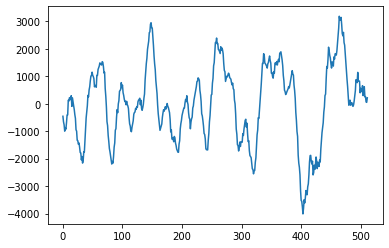

In [16]:
plt.plot(wav[30000:30000+512])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


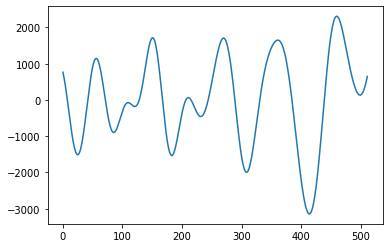

In [17]:
plt.plot(wav_LPF[30000:30000+512])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


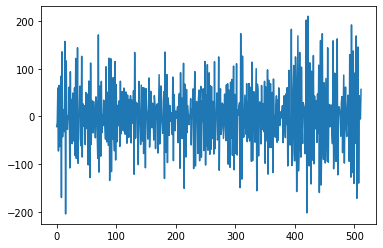

In [18]:
plt.plot(wav_HPF[30000:30000+512])